<a href="https://colab.research.google.com/github/HarshilWalia/AI/blob/master/AI_COVID_19_Pneumonia_X_Ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install --upgrade pip
!pip uninstall tensorflow
!pip install tensorflow

     |████████████████████████████████| 1.5MB 2.8MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
Found existing installation: tensorflow 2.2.0
Uninstalling tensorflow-2.2.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/autodiff/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/compat/v1/compat/v1/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/compat/v1/compat/v2/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/compat/v1/debugging/experimental/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/compat/v1/linalg/experimental/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/compat/v1/lite/experimental/microfrontend/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/compat/v1/math/special/

In [0]:
!pip install kaggle

In [0]:
#import .json file from kaggle.com

from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"harshilwalia","key":"19e0ac25ebf4ebc2c003420fd3fa79d3"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d praveengovi/coronahack-chest-xraydataset

 99% 1.17G/1.19G [00:11<00:00, 71.1MB/s]
100% 1.19G/1.19G [00:11<00:00, 109MB/s] 


In [0]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:47<00:00, 41.4MB/s]
100% 2.29G/2.29G [00:47<00:00, 51.4MB/s]


In [0]:
from zipfile import ZipFile
file_name = "chest-xray-pneumonia.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done!")

Done!


In [0]:
from zipfile import ZipFile
file_name = "coronahack-chest-xraydataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done!")

Done!


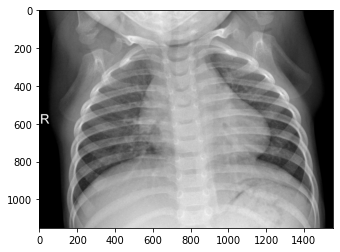

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/content/Data"

CATEGORIES = ["Corona", "Pneumonia"]

for category in CATEGORIES:  
    if(category == "Corona"):
        path = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train"
    else:
        path = "/content/chest_xray/train/PNEUMONIA "
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray')  
        plt.show()  

        break  
    break  

In [0]:
print(img_array.shape)

(1151, 1554)


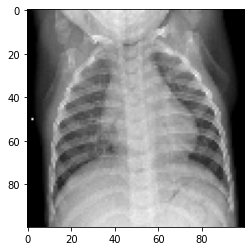

In [0]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

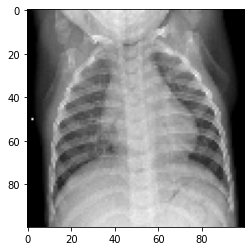

In [0]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [0]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        # path = os.path.join(DATADIR,category) 

        if(category == "Corona"):
           path = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train"
        else:
           path = "/content/chest_xray/train/PNEUMONIA"

        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([new_array, class_num])  
            except Exception as e: 
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 3875/3875 [00:18<00:00, 206.93it/s]

9184


In [0]:
import random

random.shuffle(training_data)

for sample in training_data[:15]:
    print(sample[1])

0
1
0
0
1
0
1
1
0
1
1
0
1
0
0


In [0]:
import numpy

X1 = []
y1 = []

for features,label in training_data:
    X1.append(features)
    y1.append(label)

X = numpy.array(X1)
y = numpy.array(y1)

print(type(X))
print(type(y))

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[[[104]
   [103]
   [ 99]
   ...
   [ 86]
   [131]
   [204]]

  [[100]
   [ 98]
   [ 97]
   ...
   [ 86]
   [126]
   [202]]

  [[ 98]
   [101]
   [ 96]
   ...
   [ 88]
   [116]
   [195]]

  ...

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  7]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  6]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  6]]]]


In [0]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [0]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [0]:
damn = model.fit(X, y, batch_size=32, epochs=50, validation_split=0.3)

Epoch 1/50
201/201 [==============================] - 8s 39ms/step - loss: 0.7488 - accuracy: 0.5658 - val_loss: 0.6467 - val_accuracy: 0.5584
Epoch 2/50
201/201 [==============================] - 7s 36ms/step - loss: 0.6465 - accuracy: 0.5779 - val_loss: 0.6419 - val_accuracy: 0.5570
Epoch 3/50
201/201 [==============================] - 7s 36ms/step - loss: 0.6374 - accuracy: 0.5834 - val_loss: 0.6473 - val_accuracy: 0.5610
Epoch 4/50
201/201 [==============================] - 7s 36ms/step - loss: 0.6354 - accuracy: 0.5811 - val_loss: 0.6456 - val_accuracy: 0.5457
Epoch 5/50
201/201 [==============================] - 7s 36ms/step - loss: 0.6338 - accuracy: 0.5860 - val_loss: 0.6492 - val_accuracy: 0.5472
Epoch 6/50
201/201 [==============================] - 7s 36ms/step - loss: 0.6298 - accuracy: 0.5809 - val_loss: 0.6834 - val_accuracy: 0.5573
Epoch 7/50
201/201 [==============================] - 7s 36ms/step - loss: 0.6293 - accuracy: 0.5812 - val_loss: 0.6553 - val_accuracy: 0.5276

In [0]:
print("Evaluation : ")

test_scores = model.evaluate(X, y)

print("Test Loss : ", test_scores[0])
print("Test Accuracy : ", test_scores[1])

Evaluation : 
287/287 [==============================] - 3s 12ms/step - loss: 0.6575 - accuracy: 0.5760
Test Loss :  0.6574527621269226
Test Accuracy :  0.576001763343811


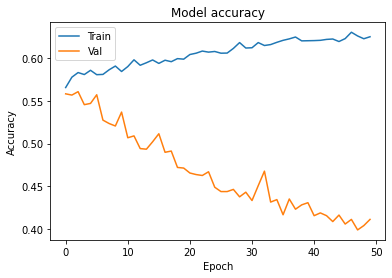

In [0]:
#Visualize the models accuracy
plt.plot(damn.history['accuracy'])
plt.plot(damn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

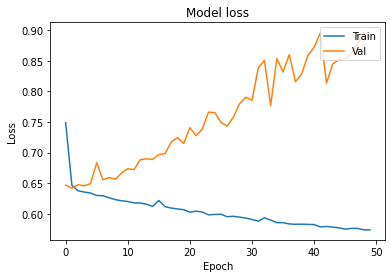

In [0]:
#Visualize the models Loss
plt.plot(damn.history['loss'])
plt.plot(damn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [0]:
from keras.models import load_model
model.save('my_model.h5')

In [0]:
from keras.models import load_model
model = load_model('my_model.h5')